<a href="https://colab.research.google.com/github/ulfhms/project-kecil/blob/main/HVC_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d codebreaker619/hepatitis-data

hepatitis-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/hepatitis-data.zip', 'r')
zip_file.extractall('/tmp/')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/tmp/hepatitis_csv.csv")

In [ ]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [ ]:
df.shape

(155, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

### Encoding categorical data

In [ ]:
df.replace({False: 0, True: 1}, inplace=True)

In [ ]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,0,live
1,50,female,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,0,live
2,78,female,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,0,live
3,31,female,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,0,live
4,34,female,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,0,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,1.0,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,1,die
151,44,female,1.0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.9,126.0,142.0,4.3,NaN,1,live
152,61,female,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.8,75.0,20.0,4.1,NaN,1,live
153,53,male,0.0,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.5,81.0,19.0,4.1,48.0,1,live


In [ ]:
data = pd.get_dummies(df['sex'])
df = pd.concat([df, data], axis=1)
df.drop(columns='sex', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   steroid          154 non-null    float64
 2   antivirals       155 non-null    int64  
 3   fatigue          154 non-null    float64
 4   malaise          154 non-null    float64
 5   anorexia         154 non-null    float64
 6   liver_big        145 non-null    float64
 7   liver_firm       144 non-null    float64
 8   spleen_palpable  150 non-null    float64
 9   spiders          150 non-null    float64
 10  ascites          150 non-null    float64
 11  varices          150 non-null    float64
 12  bilirubin        149 non-null    float64
 13  alk_phosphate    126 non-null    float64
 14  sgot             151 non-null    float64
 15  albumin          139 non-null    float64
 16  protime          88 non-null     float64
 17  histology       

In [ ]:
df

,age,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,...,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,female,male
0,30,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,85.0,18.0,4.0,NaN,0,live,0,1
1,50,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.9,135.0,42.0,3.5,NaN,0,live,1,0
2,78,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.7,96.0,32.0,4.0,NaN,0,live,1,0
3,31,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.7,46.0,52.0,4.0,80.0,0,live,1,0
4,34,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,NaN,200.0,4.0,NaN,0,live,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1.0,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,7.6,NaN,242.0,3.3,50.0,1,die,1,0
151,44,1.0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.9,126.0,142.0,4.3,NaN,1,live,1,0
152,61,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.8,75.0,20.0,4.1,NaN,1,live,1,0
153,53,0.0,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.5,81.0,19.0,4.1,48.0,1,live,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['class'] = labelencoder.fit_transform(df['class'])
df

,age,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,...,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,female,male
0,30,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,85.0,18.0,4.0,NaN,0,1,0,1
1,50,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.9,135.0,42.0,3.5,NaN,0,1,1,0
2,78,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.7,96.0,32.0,4.0,NaN,0,1,1,0
3,31,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.7,46.0,52.0,4.0,80.0,0,1,1,0
4,34,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,NaN,200.0,4.0,NaN,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1.0,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,7.6,NaN,242.0,3.3,50.0,1,0,1,0
151,44,1.0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.9,126.0,142.0,4.3,NaN,1,1,1,0
152,61,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.8,75.0,20.0,4.1,NaN,1,1,1,0
153,53,0.0,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.5,81.0,19.0,4.1,48.0,1,1,0,1


### Handling Missing Value

In [ ]:
df.fillna((df.mean()), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   steroid          155 non-null    float64
 2   antivirals       155 non-null    int64  
 3   fatigue          155 non-null    float64
 4   malaise          155 non-null    float64
 5   anorexia         155 non-null    float64
 6   liver_big        155 non-null    float64
 7   liver_firm       155 non-null    float64
 8   spleen_palpable  155 non-null    float64
 9   spiders          155 non-null    float64
 10  ascites          155 non-null    float64
 11  varices          155 non-null    float64
 12  bilirubin        155 non-null    float64
 13  alk_phosphate    155 non-null    float64
 14  sgot             155 non-null    float64
 15  albumin          155 non-null    float64
 16  protime          155 non-null    float64
 17  histology       

In [ ]:
df

,age,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,...,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,female,male
0,30,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,85.000000,18.0,4.0,61.852273,0,1,0,1
1,50,0.000000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.9,135.000000,42.0,3.5,61.852273,0,1,1,0
2,78,1.000000,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.7,96.000000,32.0,4.0,61.852273,0,1,1,0
3,31,0.506494,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.7,46.000000,52.0,4.0,80.000000,0,1,1,0
4,34,1.000000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,105.325397,200.0,4.0,61.852273,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1.000000,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,7.6,105.325397,242.0,3.3,50.000000,1,0,1,0
151,44,1.000000,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.9,126.000000,142.0,4.3,61.852273,1,1,1,0
152,61,0.000000,0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.8,75.000000,20.0,4.1,61.852273,1,1,1,0
153,53,0.000000,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.5,81.000000,19.0,4.1,48.000000,1,1,0,1


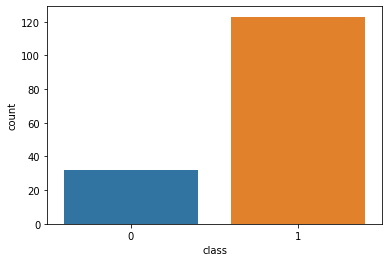

In [ ]:
sns.countplot('class',data=df)

In [ ]:
df['class'].value_counts()

1    123
0     32
Name: class, dtype: int64

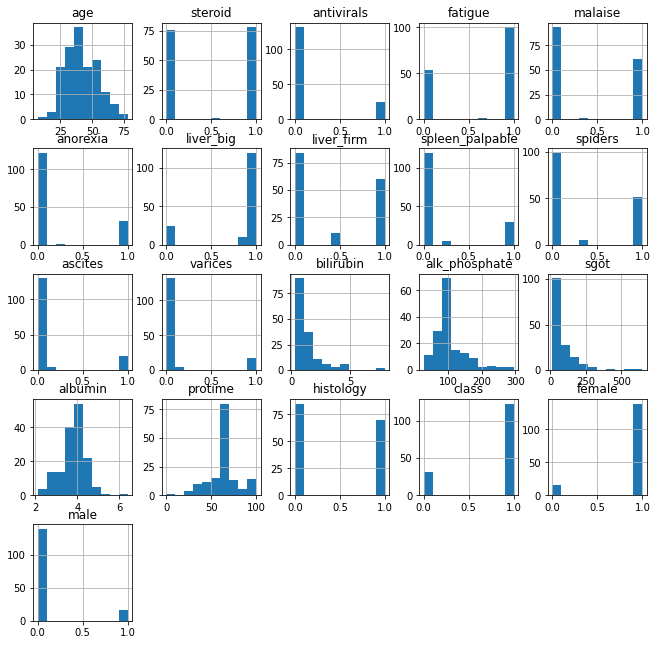

In [ ]:
df.hist(bins=10,figsize=(11,11))
plt.show()

### Correlation

In [ ]:
import plotly.express as px
corr = df.corr().loc["class"].to_frame().iloc[0:21]
corr = corr.rename(columns={"index":"feature", "class":"class"})
corr = corr["class"].sort_values(ascending=False).to_frame()
px.imshow(corr)

In [ ]:
df.drop(['female','male','alk_phosphate','anorexia','sgot','liver_big','liver_firm','antivirals','steroid','spleen_palpable','age'],axis=1, inplace=True)
df

,fatigue,malaise,spiders,ascites,varices,bilirubin,albumin,protime,histology,class
0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,61.852273,0,1
1,1.0,0.0,0.0,0.0,0.0,0.9,3.5,61.852273,0,1
2,1.0,0.0,0.0,0.0,0.0,0.7,4.0,61.852273,0,1
3,0.0,0.0,0.0,0.0,0.0,0.7,4.0,80.000000,0,1
4,0.0,0.0,0.0,0.0,0.0,1.0,4.0,61.852273,0,1
...,...,...,...,...,...,...,...,...,...,...
150,1.0,1.0,1.0,1.0,1.0,7.6,3.3,50.000000,1,0
151,1.0,0.0,0.0,0.0,0.0,0.9,4.3,61.852273,1,1
152,1.0,1.0,1.0,0.0,0.0,0.8,4.1,61.852273,1,1
153,1.0,0.0,1.0,0.0,1.0,1.5,4.1,48.000000,1,1


### Handling Imbalanced Data

In [ ]:
X = df.drop(columns='class',axis=1)
y = df['class']

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
counter = Counter(y)
print(f'before oversampling = {counter}')
smt = SMOTE()
X,y = smt.fit_resample(X, y)
counter = Counter(y)
print(f'after oversampling = {counter}')

before oversampling = Counter({1: 123, 0: 32})
after oversampling = Counter({1: 123, 0: 123})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.3,random_state=42)

In [ ]:
X_test.shape,y_test.shape, X_train.shape,y_train.shape

((74, 9), (74,), (172, 9), (172,))

### klasifikasi

In [ ]:
# klasifikasi model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb={
    'var_smoothing' : np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=-1, cv=10, n_jobs=-1)

In [ ]:
best_model= nbModel_grid.fit(X_train, y_train)

In [ ]:
nb_pred=best_model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print("Adapun Laporan Klasifikasi :\n",classification_report(y_test,nb_pred))
print("\n F1: \n",f1_score(y_test,nb_pred))
print("\n Precision score adalah \n",precision_score(y_test,nb_pred))
print("\n Recall scorenya adalah \n"),recall_score(y_test,nb_pred)
print("\n Confusiion Matrixnya adalah \n")


Adapun Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.91      0.73      0.81        41
           1       0.73      0.91      0.81        33

    accuracy                           0.81        74
   macro avg       0.82      0.82      0.81        74
weighted avg       0.83      0.81      0.81        74


 F1: 
 0.8108108108108109

 Precision score adalah 
 0.7317073170731707

 Recall scorenya adalah 


 Confusiion Matrixnya adalah 



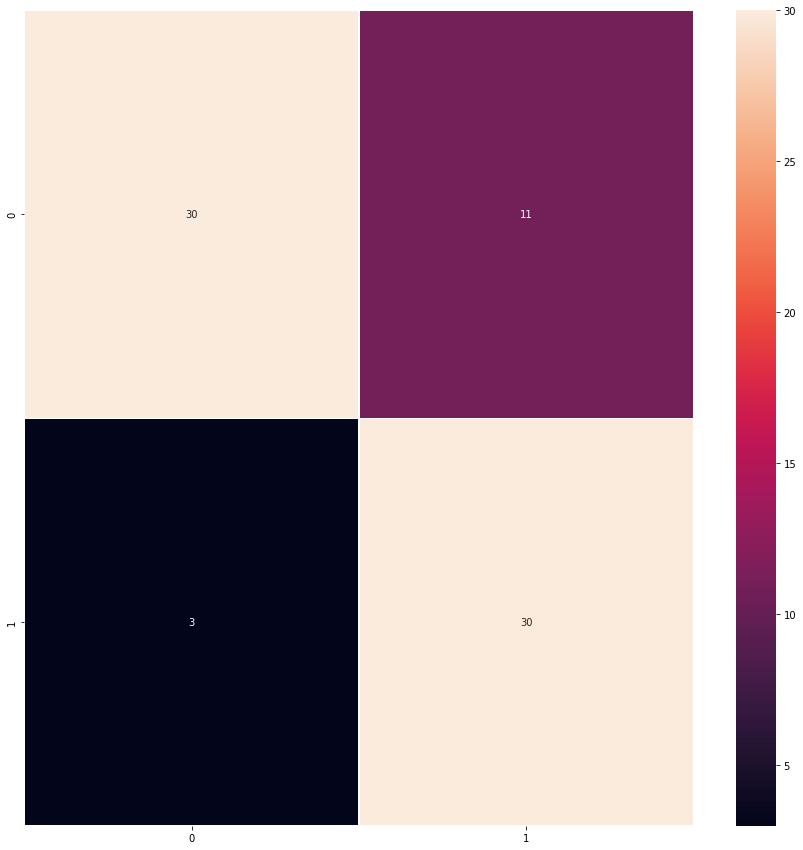

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test,nb_pred), annot=True, linewidths=.15, ax=ax)

In [ ]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=0)

In [ ]:
params = {
    'max_depth': [5, 15, 25, 30],
    'min_samples_leaf': [15, 25, 50, 100, 120],
    'criterion': ["gini","entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=1, scoring = "accuracy")

In [ ]:
best_model=grid_search.fit(X_train, y_train)

In [ ]:
dt_pred=best_model.predict(X_test)

In [ ]:
print("Adapun Laporan Klasifikasi :\n",classification_report(y_test,dt_pred))
print("\n F1: \n",f1_score(y_test,dt_pred))
print("\n Precision score adalah \n",precision_score(y_test,dt_pred))
print("\n Recall scorenya adalah \n"),recall_score(y_test,dt_pred)
print("\n Confusiion Matrixnya adalah \n")


Adapun Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.92      0.83      0.87        41
           1       0.81      0.91      0.86        33

    accuracy                           0.86        74
   macro avg       0.86      0.87      0.86        74
weighted avg       0.87      0.86      0.87        74


 F1: 
 0.8571428571428571

 Precision score adalah 
 0.8108108108108109

 Recall scorenya adalah 


 Confusiion Matrixnya adalah 



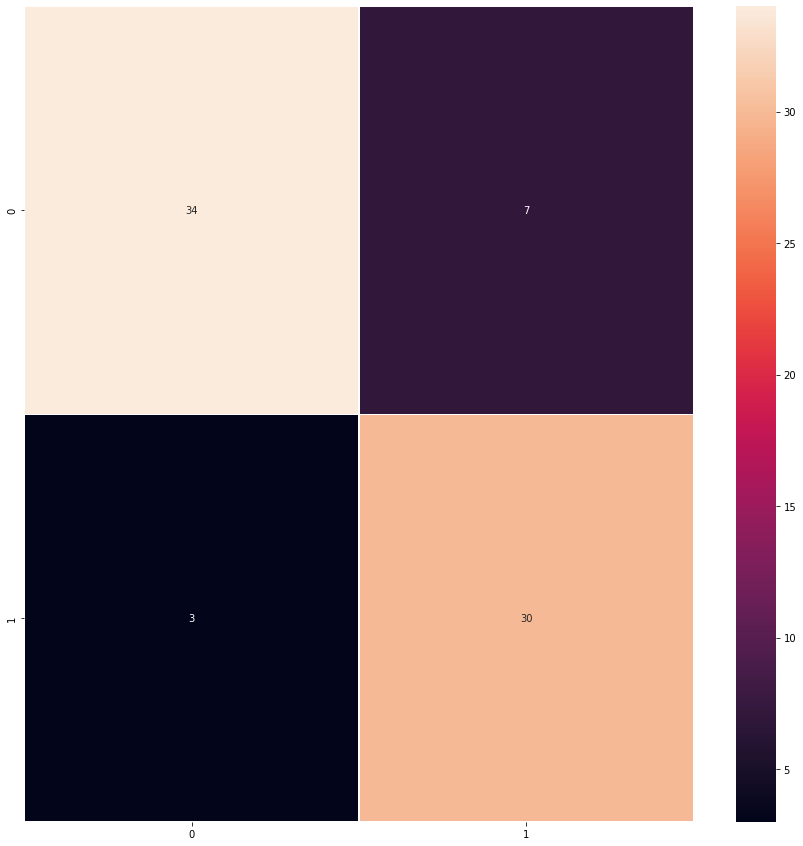

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test,dt_pred), annot=True, linewidths=.15, ax=ax)

### Dengan Normalisasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df)

MinMaxScaler()

In [ ]:
data = scaler.transform(df)

In [ ]:
data

array([[0.        , 0.        , 0.        , ..., 0.61852273, 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.61852273, 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.61852273, 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.61852273, 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.48      , 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.42      , 1.        ,
        0.        ]])

In [ ]:
cols = df.columns

In [ ]:
df_scaled = pd.DataFrame(data, columns = cols)

In [ ]:
df_scaled

,fatigue,malaise,spiders,ascites,varices,bilirubin,albumin,protime,histology,class
0,0.0,0.0,0.0,0.0,0.0,0.090909,0.441860,0.618523,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.077922,0.325581,0.618523,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.051948,0.441860,0.618523,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.051948,0.441860,0.800000,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.090909,0.441860,0.618523,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
150,1.0,1.0,1.0,1.0,1.0,0.948052,0.279070,0.500000,1.0,0.0
151,1.0,0.0,0.0,0.0,0.0,0.077922,0.511628,0.618523,1.0,1.0
152,1.0,1.0,1.0,0.0,0.0,0.064935,0.465116,0.618523,1.0,1.0
153,1.0,0.0,1.0,0.0,1.0,0.155844,0.465116,0.480000,1.0,1.0


In [ ]:
X = df.drop(columns='class',axis=1)
y = df['class']

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
counter = Counter(y)
print(f'before oversampling = {counter}')
smt = SMOTE()
X,y = smt.fit_resample(X, y)
counter = Counter(y)
print(f'after oversampling = {counter}')

before oversampling = Counter({1: 123, 0: 32})
after oversampling = Counter({1: 123, 0: 123})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.3,random_state=42)

In [ ]:
# klasifikasi model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb={
    'var_smoothing' : np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=-1, cv=10, n_jobs=-1)

In [ ]:
best_model= nbModel_grid.fit(X_train, y_train)

In [ ]:
nb_pred=best_model.predict(X_test)

In [ ]:
print("Adapun Laporan Klasifikasi :\n",classification_report(y_test,nb_pred))
print("\n F1: \n",f1_score(y_test,nb_pred))
print("\n Precision score adalah \n",precision_score(y_test,nb_pred))
print("\n Recall scorenya adalah \n"),recall_score(y_test,nb_pred)
print("\n Confusiion Matrixnya adalah \n")


Adapun Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.90      0.63      0.74        41
           1       0.67      0.91      0.77        33

    accuracy                           0.76        74
   macro avg       0.78      0.77      0.76        74
weighted avg       0.79      0.76      0.75        74


 F1: 
 0.7692307692307692

 Precision score adalah 
 0.6666666666666666

 Recall scorenya adalah 


 Confusiion Matrixnya adalah 



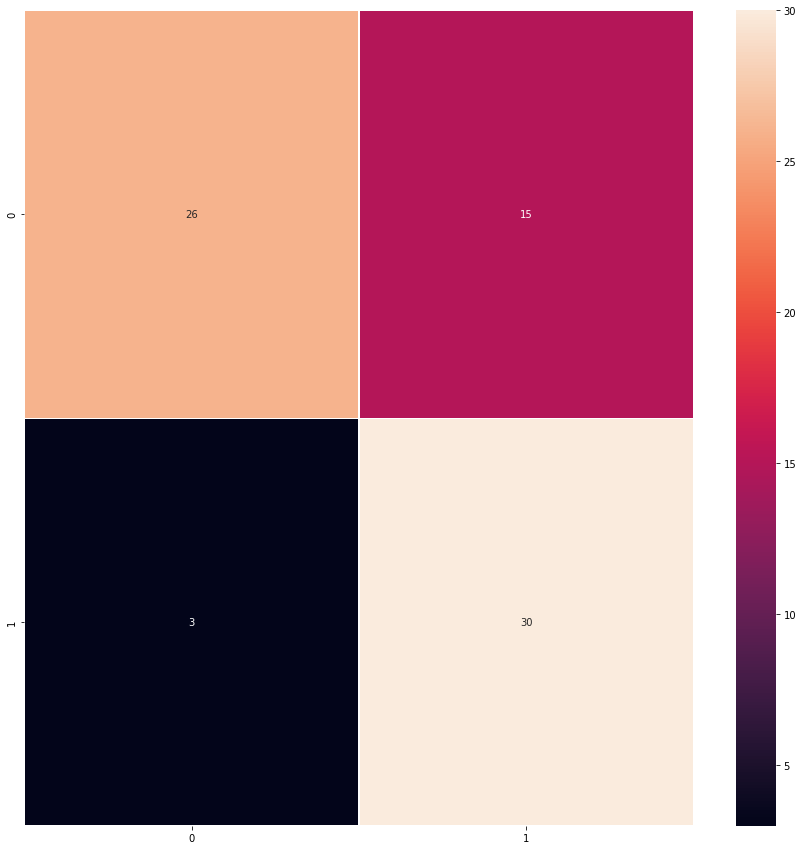

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test,nb_pred), annot=True, linewidths=.15, ax=ax)

In [ ]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=0)

In [ ]:
params = {
    'max_depth': [5, 15, 25, 30],
    'min_samples_leaf': [15, 25, 50, 100, 120],
    'criterion': ["gini","entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=1, scoring = "accuracy")

In [ ]:
best_model=grid_search.fit(X_train, y_train)

In [ ]:
dt_pred=best_model.predict(X_test)

In [ ]:
print("Adapun Laporan Klasifikasi :\n",classification_report(y_test,dt_pred))
print("\n F1: \n",f1_score(y_test,dt_pred))
print("\n Precision score adalah \n",precision_score(y_test,dt_pred))
print("\n Recall scorenya adalah \n"),recall_score(y_test,dt_pred)
print("\n Confusiion Matrixnya adalah \n")


Adapun Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.88      0.71      0.78        41
           1       0.71      0.88      0.78        33

    accuracy                           0.78        74
   macro avg       0.79      0.79      0.78        74
weighted avg       0.80      0.78      0.78        74


 F1: 
 0.7837837837837839

 Precision score adalah 
 0.7073170731707317

 Recall scorenya adalah 


 Confusiion Matrixnya adalah 



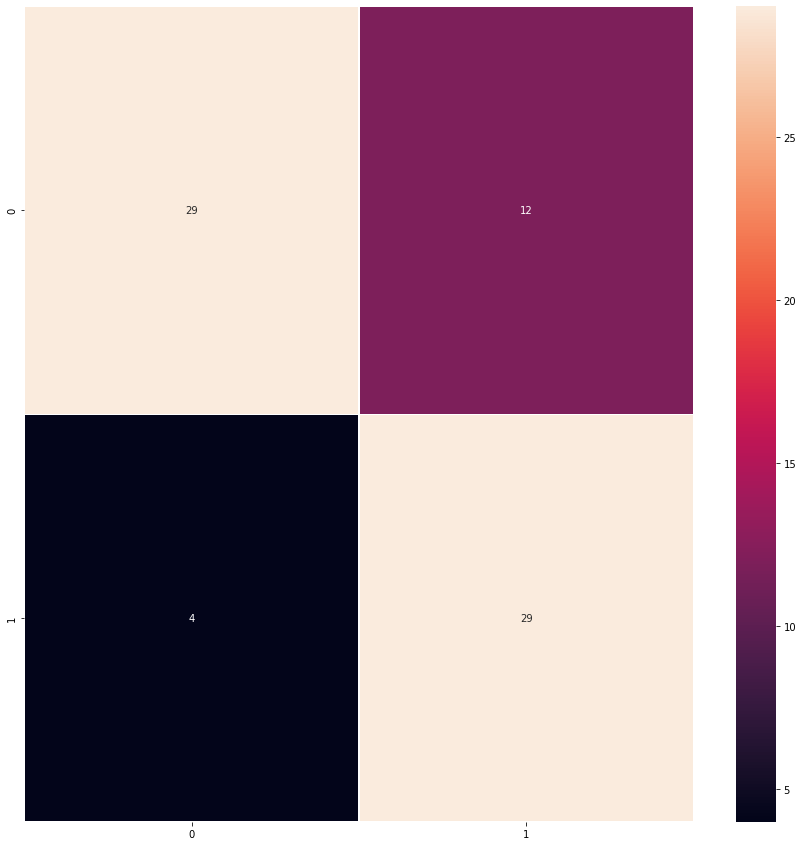

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test,dt_pred), annot=True, linewidths=.15, ax=ax)